In [1]:
from Coulomb import *
from plotting import *

In [2]:
test = Coulomb(QE, QE, MI, MI, 200, 1E19, False, False, True)

In [3]:
help(Coulomb.__init__)

Help on function __init__ in module Coulomb:

__init__(self, qa, qb, ma, mb, temp_b, n, slow=True, para=True, perp=True)
    qa, ma: charge and mass of test particle [kg, Coulomb]
    qb, mb: charge and mass of background particle [kg, Coulomb]
    temp_b: temperature of background species [eV]
    n:      density of background species [m^-3]



In [4]:
vHist2_EM = test.beam_EM(17000, 100, 1E-2, 0.2)
speed2_EM = np.linalg.norm(vHist2_EM, axis = -1)
vHist4_EM = test.beam_EM(17000, 100, 1E-4, 0.2)
speed4_EM = np.linalg.norm(vHist4_EM, axis = -1)

In [5]:
vHist2 = test.beam_MEM(17000, 100, 1E-2, 0.2)
speed2 = np.linalg.norm(vHist2, axis = -1)
vHist4 = test.beam_MEM(17000, 100, 1E-4, 0.2)
speed4 = np.linalg.norm(vHist4, axis = -1)

In [6]:
help(formatAndSave)

Help on function formatAndSave in module plotting:

formatAndSave(fig, ax, lines, xlabel, ylabel, legends=None, title=None, fontsize=14, filename=None)
    formats the current figure, and save to file if filename is provided.



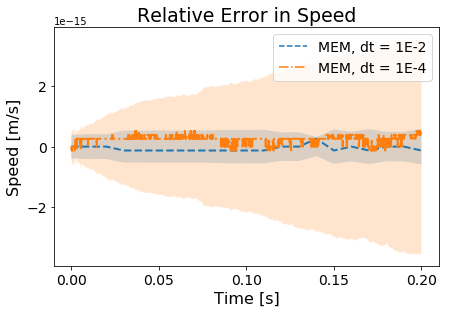

In [7]:
fig, ax = plt.subplots()
lines = []
# lines = aveAndSTD(ax, speed2_EM, 0.2, label = 'EM, dt = 1E-2')
# lines += aveAndSTD(ax, speed4_EM, 0.2, label = 'EM, dt = 1E-4')
lines += aveAndSTD(ax, speed2, 0.2, markers = '--', label = 'MEM, dt = 1E-2')
lines += aveAndSTD(ax, speed4, 0.2, markers = '-.', label = 'MEM, dt = 1E-4')
plt.ticklabel_format(axis = 'y', style = 'sci', scilimits=(0, 0))
# ax.linewidth(2)
formatAndSave(fig, ax, lines, 'Time [s]', 'Speed [m/s]', title = "Relative Error in Speed", fontsize = 16, filename = "MEM_rel.pdf")


No handles with labels found to put in legend.


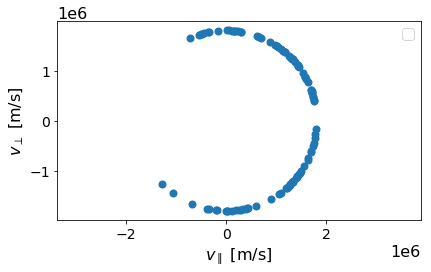

In [8]:
tslice = 2001
vx4 = vHist4[tslice, :, 0];
vy4 = vHist4[tslice, :, 1];
vz4 = vHist4[tslice, :, 2];
vperp4 = np.sqrt(vy4**2 + vz4**2) * np.sign(vz4);
# vexp4 = np.sqrt(vHist4[0, :, 0]**2 - vx4**2)
fig, ax = plt.subplots()
lines = ax.scatter(vx4, vperp4);
plt.axis('equal');
plt.ticklabel_format(axis = 'x', style = 'sci', scilimits=(0, 0))
plt.ticklabel_format(axis = 'y', style = 'sci', scilimits=(0, 0))
formatAndSave(fig, ax, lines, '$v_\parallel$ [m/s]', '$v_\perp$ [m/s]', fontsize = 16, filename = 'Circle.pdf')

In [9]:
vHist3 = test.beam_MEM(17000, 100, 1E-3, 0.5)

[  0. 100. 200. 300. 400. 501.]


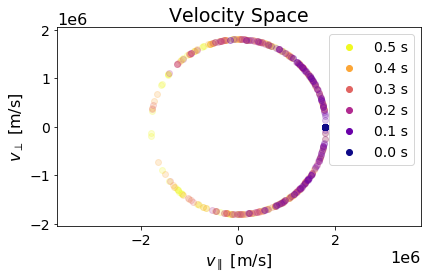

In [11]:
fig, ax = plt.subplots()
vSpaceSnaps(ax, vHist3, np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5]), 0.5)
formatAndSave(fig, ax, lines, '$v_\parallel$ [m/s]', '$v_\perp$ [m/s]', 
              title = 'Velocity Space', fontsize = 16, filename = 'Circle_snaps.pdf')

In [12]:
iters, imean, ivar, i_pitch_mean, i_pitch_var, v_init = test.pitchIter(17000, 100, 1E-3, 
                                                                       0, 500, 10, 5, 'MEM', silent = True)

In [20]:
a, b, c, init = test.energyConvergence(17000, 100, -4, -1, 0.2, 5, 'MEM', silent = True)

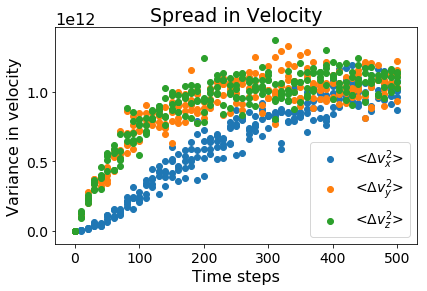

In [43]:
fig, ax = plt.subplots()
# plt.plot(iters, ivar[:, 0], alpha = 0.3)
plt.scatter(iters, ivar[:, 0])
# plt.plot(iters, ivar[:, 1], alpha = 0.3)
plt.scatter(iters, ivar[:, 1])
# plt.plot(iters, ivar[:, 2], alpha = 0.3)
plt.scatter(iters, ivar[:, 2])
formatAndSave(fig, ax, lines, 'Time steps', 'Variance in velocity', 
              title = 'Spread in Velocity', fontsize = 16,
              legends = ['<$\Delta v_x^2$>', '<$\Delta v_y^2$>', '<$\Delta v_z^2$>'],
              filename = 'velocity_spread_iterations_500.pdf')

In [24]:
def plotConvergence(ax, x_data, y_data):
    if len(y_data.shape) ==1:
        ax.scatter(x_data, y_data)
    else:
        for i in range(y_data.shape[-1]):
            ax.scatter(x_data, y_data[:, i])
    return

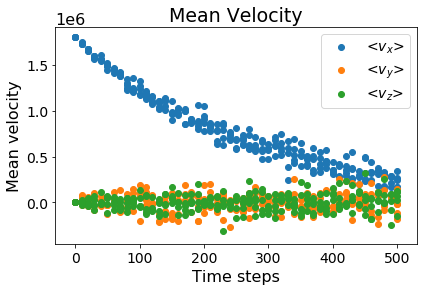

In [42]:
fig, ax = plt.subplots()
plotConvergence(ax, iters, imean)
plt.ticklabel_format(axis = 'y', style = 'sci', scilimits=(0, 0))
formatAndSave(fig, ax, lines, 'Time steps', 'Mean velocity', 
              title = 'Mean Velocity', fontsize = 16,
              legends = ['<$v_x$>', '<$v_y$>', '<$v_z$>'],
             filename = 'mean_v_iterations_500')

In [4]:
vHist = test.beam_MEM(17000, 1000, 1E-4, 0.5)
vHist.shape

(5002, 1000, 3)

In [5]:
vDiff = np.diff(vHist, n =2,  axis = 0)
time = np.linspace(0, 0.2, vDiff.shape[0])
print(vDiff.shape)
# fig = plt.plot(time, vDiff[:,:,1])

(5000, 1000, 3)


In [6]:
vVar = np.var(vDiff, axis = 1)
print(vVar.shape)

(5000, 3)


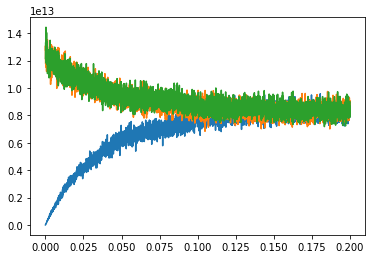

In [7]:
fig = plt.plot(time, vVar/(2e-4))

In [8]:
vHistEM = test.beam_EM(17000, 1000, 1E-4, 0.5)
vHistEM.shape

(5002, 1000, 3)

In [9]:
vDiffEM = np.diff(vHistEM, n =2,  axis = 0)
timeEM = np.linspace(0, 0.2, vDiffEM.shape[0])
print(vDiffEM.shape)
# fig = plt.plot(time, vDiff[:,:,1])

(5000, 1000, 3)


In [10]:
vVarEM = np.var(vDiffEM, axis = 1)
print(vVarEM.shape)

(5000, 3)


No handles with labels found to put in legend.


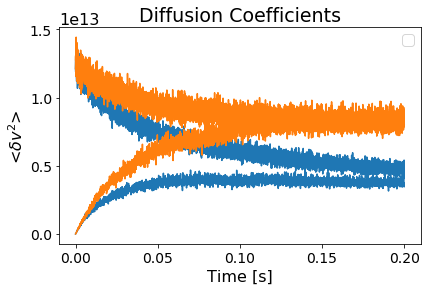

In [55]:
fig, ax = plt.subplots()
line = plt.plot(timeEM, vVarEM/(2e-4), 'C0')
line += plt.plot(time, vVar/(2e-4), 'C1')
plt.legend([line[2], line[3]], ['EM', 'MEM'])
# ax.legend(lines)
formatAndSave(fig, ax, lines, 'Time [s]', '<$\delta v^2$>', 
              title = 'Diffusion Coefficients', fontsize = 16,
#               legends = [[line[2], line[3]], ['EM', 'MEM']],
             filename = 'D_perp_comparison.pdf')

In [30]:
np.savetxt('vVar4EM.txt', vVarEM)
np.savetxt('vVar4MEM.txt', vVar)

In [13]:
vHist5 = test.beam_MEM(17000, 1000, 1E-5, 0.5)
vHist5.shape

(50001, 1000, 3)

In [68]:
def saveHist(hist, name):
    for i in range(3):
        np.savetxt(name+ str(i) + '.txt', hist[:, :, i])

In [74]:
vx5 = vHist5[:, :, 0]
vx5.shape
# np.savetxt('vHist5_MEM_perp.txt',vx5)

(50001, 1000)

In [14]:
vDiff5 = np.diff(vHist5, n =2,  axis = 0)
time5 = np.linspace(0, 0.2, vDiff5.shape[0])
print(vDiff5.shape)
# fig = plt.plot(time, vDiff[:,:,1])

(49999, 1000, 3)


In [15]:
vVar5 = np.var(vDiff5, axis = 1)
print(vVar5.shape)

(49999, 3)


In [73]:
np.savetxt('vVar5.txt', vVar5)

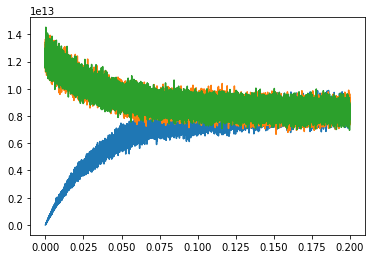

In [19]:
fig = plt.plot(time5, vVar5/(2e-5))
# fig = plt.plot(timeEM, vVarEM/(2e-4))

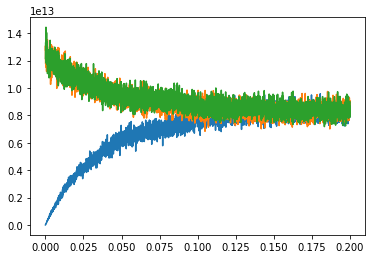

In [20]:
fig = plt.plot(time, vVar/(2e-4))

In [21]:
vHist5.shape

(50001, 1000, 3)

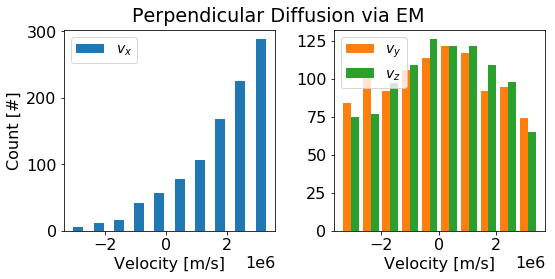

In [67]:
first = vHistEM[0, :, 1:]
last = vHistEM[-1, :, 1:]

fig= plt.figure()
ax0 = fig.add_subplot(121)
plt.ticklabel_format(axis = 'x', style = 'sci', scilimits=(0, 0))
ax1 = fig.add_subplot(122)
plt.suptitle('Perpendicular Diffusion via EM')
updateGlobal(16)

fig.set_size_inches(8, 4)
plt.ticklabel_format(axis = 'x', style = 'sci', scilimits=(0, 0))

ax0.hist(vHistEM[-1, :, 0], color = 'C0', rwidth = 0.5)
ax0.legend(['$v_x$'])
ax0.set_ylabel('Count [#]')
ax0.set_xlabel('Velocity [m/s]')

ax1.hist(last, label = ['vy', 'vz'], color = ['C1', 'C2'])
ax1.set_xlabel('Velocity [m/s]')
ax1.legend(['$v_y$', '$v_z$'])
# ax1.axes.yaxis.set_ticklabels([])
plt.tight_layout()
plt.subplots_adjust(top = 0.9)

fig.savefig('dist_perp_EM.pdf',bbox_inches = 'tight')

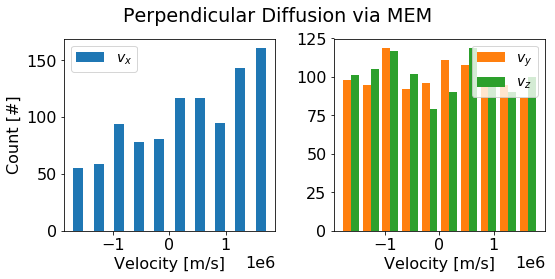

In [66]:
first = vHist[0, :, 1:]
last = vHist[-1, :, 1:]

fig= plt.figure()
ax0 = fig.add_subplot(121)
plt.ticklabel_format(axis = 'x', style = 'sci', scilimits=(0, 0))
ax1 = fig.add_subplot(122)
plt.suptitle('Perpendicular Diffusion via MEM')
updateGlobal(16)

fig.set_size_inches(8, 4)
plt.ticklabel_format(axis = 'x', style = 'sci', scilimits=(0, 0))

ax0.hist(vHist[-1, :, 0], color = 'C0', rwidth = 0.5)
ax0.legend(['$v_x$'])
ax0.set_ylabel('Count [#]')
ax0.set_xlabel('Velocity [m/s]')

ax1.hist(last, label = ['vy', 'vz'], color = ['C1', 'C2'])
ax1.set_xlabel('Velocity [m/s]')
ax1.legend(['$v_y$', '$v_z$'])
# ax1.axes.yaxis.set_ticklabels([])
plt.tight_layout()
plt.subplots_adjust(top = 0.87)

fig.savefig('dist_perp_MEM.pdf',bbox_inches = 'tight')

In [4]:
empty = np.zeros((3, 5, 2))
vector = np.ones((5, 2))
empty[2] = vector
print(empty)

[[[0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]]

 [[1. 1.]
  [1. 1.]
  [1. 1.]
  [1. 1.]
  [1. 1.]]]


In [ ]:
moments = [1, 2, 3, 4]
iList, momList = test.pitchIter(17000, 100, 1E-3, 10, 100, 10, 10, moments, 'MEM', False, True)

In [ ]:
print(iList.shape, momList.shape)
aveMom = np.mean(momList, axis = 1)
steMom = stats.sem(momList, axis = 1)
print(aveMom.shape)
# print(dtList, aveMom)
# plt.plot(iList, aveMom[:, 2, 0])
momIndex = 1
plt.errorbar(iList, aveMom[:, momIndex,0], steMom[:, momIndex, 0], capsize = 3)
plt.errorbar(iList, aveMom[:, momIndex,1], steMom[:, momIndex, 1], capsize = 3)
plt.errorbar(iList, aveMom[:, momIndex,2], steMom[:, momIndex, 2], capsize = 3)

# plt.xscale('log')
# plt.yscale('log')

In [ ]:
moments = [1, 2, 3, 4]
dtList, momList = test.pitchConvergence(17000, 1000, -4, -1, 0.2, 10, moments, 'MEM', False, True)

In [ ]:
print(dtList.shape, momList.shape)
aveMom = np.mean(momList, axis = 1)
steMom = stats.sem(momList, axis = 1)
print(aveMom.shape)
# print(dtList, aveMom)
# plt.plot(dtList, aveMom[:, 2, 0])
momIndex = 1
plt.errorbar(dtList, aveMom[:, momIndex,1], steMom[:, momIndex, 1], capsize = 3)
plt.xscale('log')
# plt.yscale('log')